In [7]:
#Q9,Q10
import numpy as np

data = np.loadtxt('r07922003/hw2_lssvm_all.dat.txt')
train_x = np.concatenate((np.ones((500,1)),data[:,:-1]),axis=1)[0:400]
train_y = np.array(data[0:400,-1])
test_x = np.concatenate((np.ones((500,1)),data[:,:-1]),axis=1)[400:]
test_y = np.array(data[400:,-1])
Lambda = [0.05,0.5,5,50,500]
E_in = []
E_out = []
for i in Lambda:
    w = np.dot(np.dot(np.linalg.inv(i*np.identity(train_x.shape[1])+np.dot(np.transpose(train_x),train_x)),np.transpose(train_x)),train_y)
    train_result = np.sign(np.dot(w,np.transpose(train_x)))
    test_result = np.sign(np.dot(w,np.transpose(test_x)))
    ein = np.mean(train_result != train_y)
    eout = np.mean(test_result != test_y)
    E_in.append(ein)
    E_out.append(eout)
print("E in =",E_in)
print("E out=",E_out)

E in = [0.3175, 0.3175, 0.32, 0.315, 0.33]
E out= [0.36, 0.36, 0.36, 0.4, 0.37]


In [20]:
#Q11,Q12
import numpy as np

data = np.loadtxt('hw2_lssvm_all.dat.txt')
train_x = np.concatenate((np.ones((500,1)),data[:,:-1]),axis=1)[0:400]
train_y = np.array(data[0:400,-1])
test_x = np.concatenate((np.ones((500,1)),data[:,:-1]),axis=1)[400:]
test_y = np.array(data[400:,-1])
Lambda = [0.05,0.5,5,50,500]
g_train = np.zeros((len(Lambda),train_y.shape[0]))
g_test = np.zeros((len(Lambda),test_y.shape[0]))
E_in = []
E_out = []
#not repeat data
"""
for seed in range(250):
    np.random.seed(seed+1120)
    new_data = np.random.shuffle(data)
    bootstrapped_x = np.concatenate((np.ones((500,1)),data[:,:-1]),axis=1)[0:400]
    bootstrapped_y = np.array(data[0:400,-1])
    for index in range(len(Lambda)):
        i = Lambda[index]
        w = np.dot(np.dot(np.linalg.inv(i*np.identity(bootstrapped_x.shape[1])+np.dot(np.transpose(bootstrapped_x),
                                        bootstrapped_x)),np.transpose(bootstrapped_x)),bootstrapped_y)
        train_result = np.sign(np.dot(w,np.transpose(train_x)))
        g_train[index] += train_result
        test_result = np.sign(np.dot(w,np.transpose(test_x)))
        g_test[index] += test_result
g_train = np.sign(g_train)
g_test = np.sign(g_test)
for i in g_train:
    ein = np.mean(i != train_y)
    E_in.append(ein)
for i in g_test:
    eout = np.mean(i != test_y)
    E_out.append(eout)
print("E in =",E_in)
print("E out=",E_out)
"""
#隨機取可重複
np.random.seed()
for iter in range(250):
    bootstrapped_x = []
    bootstrapped_y = []
    for i in range(400):
        random = np.random.randint(low=0,high=400)
        bootstrapped_x.append(train_x[random])
        bootstrapped_y.append(train_y[random])
    bootstrapped_x=np.array(bootstrapped_x)
    bootstrapped_y=np.array(bootstrapped_y)
    for index in range(len(Lambda)):
        i = Lambda[index]
        w = np.dot(np.dot(np.linalg.inv(i*np.identity(bootstrapped_x.shape[1])+np.dot(np.transpose(bootstrapped_x),
                                        bootstrapped_x)),np.transpose(bootstrapped_x)),bootstrapped_y)
        train_result = np.sign(np.dot(w,np.transpose(train_x)))
        g_train[index] += train_result
        test_result = np.sign(np.dot(w,np.transpose(test_x)))
        g_test[index] += test_result
g_train = np.sign(g_train)
g_test = np.sign(g_test)
for i in g_train:
    ein = np.mean(i != train_y)
    E_in.append(ein)
for i in g_test:
    eout = np.mean(i != test_y)
    E_out.append(eout)
print("E in =",E_in)
print("E out=",E_out)

E in = [0.3175, 0.3175, 0.32, 0.315, 0.325]
E out= [0.36, 0.36, 0.36, 0.39, 0.37]


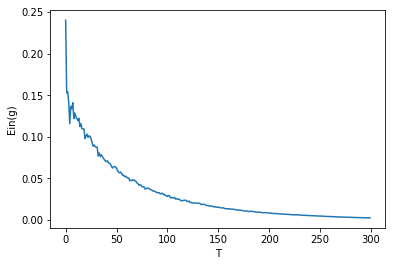

Ein(gT)= 0.0026331261839371276


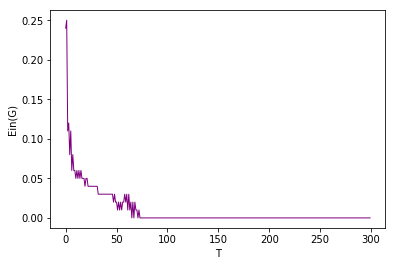

Ein(GT)= 0.0


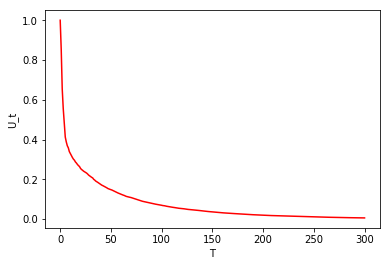

U_T= 0.006298022460720289


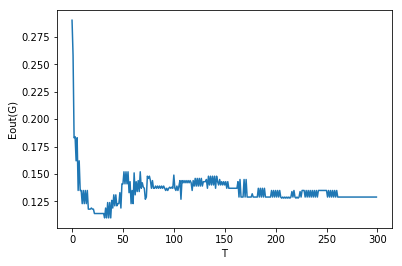

Eout(T)= 0.129


In [25]:
#Q13#Q14#Q15#Q16
import numpy as np
import matplotlib.pyplot as plt

train_data = np.loadtxt('hw2_adaboost_train.dat.txt')
test_data = np.loadtxt('hw2_adaboost_test.dat.txt')
train_x = train_data[:,0:2]
train_y = train_data[:,-1]
train_num = len(train_x)
test_x = test_data[:,0:2]
test_y = test_data[:,-1]

#<----step 1---->
feature1 = np.array(sorted(train_x,key = lambda x:x[0]))
feature2 = np.array(sorted(train_x,key = lambda x:x[1]))
#<----step 2---->
theta1=[]
x1 = feature1[:,0]
temp = []
temp = np.append(x1[1:],0)
theta1 = np.append(-1*float("inf"),((temp+x1)/2)[:-1])

theta2=[]
x2 = feature2[:,1]
temp = []
temp = np.append(x1[1:],0)
theta2 = np.append(-1*float("inf"),((temp+x2)/2)[:-1])

theta = np.array([theta1,theta2])

Alpha = []
U = []
G = []
G_out = []
E_in_G = []
E_out = []
optimal = [] # data structure = s feature_i theta error
for T in range(300):
    if T==0:
        u = np.ones(shape=(train_x.shape[0]))/train_num
        U.append(u)
        best = np.zeros(shape=(2,3)) # data structure = s theta error
        for i in range(len(theta)):
            error = 1
            for threshold in theta[i]:
                #s = 1
                predict = 1 * np.sign(train_x[:,i]-threshold)
                error_1 = np.dot(u,predict!=train_y)
                #s = -1
                predict = (-1) * np.sign(train_x[:,i]-threshold)
                error_2 = np.dot(u,predict!=train_y)
                #print(threshold,error_1,error_2)
                if error_1 < error_2:
                    if error > error_1:
                        error = error_1
                        best[i][0] = 1  #s=1
                        best[i][1] = threshold
                        best[i][2] = error
                else:
                    if error > error_2:
                        error = error_2
                        best[i][0] = -1 #s=-1
                        best[i][1] = threshold
                        best[i][2] = error
        #<----step 3---->
        if best[0][2] < best[1][2]:
            optimal.append([best[0][0],1,best[0][1],best[0][2]])
        else:
            optimal.append([best[1][0],2,best[1][1],best[1][2]])
        
        optimal_threshold = optimal[T][2]
        feature_i = optimal[T][1]
        s = optimal[T][0]
        predict = s * np.sign(train_x[:,feature_i-1]-optimal_threshold)
        error = predict!=train_y
        epsilon = (np.dot(u,error))/np.sum(u)
        weight = np.sqrt((1-epsilon)/epsilon)
        new_u = np.zeros(shape=(train_x.shape[0]))
        for index in range(len(error)):
            if error[index]:
                new_u[index] = u[index]*weight
            else:
                new_u[index] = u[index]/weight
        temp = new_u
        U.append(temp)
        Alpha.append(np.log(weight))
        
        #calculate G
        g = Alpha[T]*predict
        G.append(np.sign(g))
        E_in_G.append(np.mean(G[T]!=train_y))
        #calculate E_out
        predict = s*np.sign(test_x[:,feature_i-1]-optimal_threshold)
        g_out = Alpha[T]*predict
        G_out.append(np.sign(g_out))
        E_out.append(np.mean(G_out[T]!=test_y))
        
    else:
        u =U[T]
        best = np.zeros(shape=(2,3)) # data structure = s theta error
        for i in range(len(theta)):
            error = 1
            for threshold in theta[i]:
                #s = 1
                predict = 1 * np.sign(train_x[:,i]-threshold)
                error_1 = np.dot(u,predict!=train_y)
                #s = -1
                predict = (-1) * np.sign(train_x[:,i]-threshold)
                error_2 = np.dot(u,predict!=train_y)
                #print(threshold,error_1,error_2)
                if error_1 < error_2:
                    if error > error_1:
                        error = error_1
                        best[i][0] = 1  #s=1
                        best[i][1] = threshold
                        best[i][2] = error
                else:
                    if error > error_2:
                        error = error_2
                        best[i][0] = -1 #s=-1
                        best[i][1] = threshold
                        best[i][2] = error
        #<----step 3---->
        if best[0][2] < best[1][2]:
            optimal.append([best[0][0],1,best[0][1],best[0][2]])
        else:
            optimal.append([best[1][0],2,best[1][1],best[1][2]])
        
        optimal_threshold = optimal[T][2]
        feature_i = optimal[T][1]
        s = optimal[T][0]
        predict = s * np.sign(train_x[:,feature_i-1]-optimal_threshold)
        error = predict!=train_y
        epsilon = (np.dot(u,error))/np.sum(u)
        weight = np.sqrt((1-epsilon)/epsilon)
        new_u = np.zeros(shape=(train_x.shape[0]))
        for index in range(len(error)):
            if error[index]:
                new_u[index] = u[index]*weight
            else:
                new_u[index] = u[index]/weight
        temp = new_u
        U.append(temp)
        Alpha.append(np.log(weight))
        
        #calculate G
        g = g + Alpha[T]*predict
        G.append(np.sign(g))
        E_in_G.append(np.mean(G[T]!=train_y))
        #calculate E_out
        predict = s*np.sign(test_x[:,feature_i-1]-optimal_threshold)
        g_out = g_out + Alpha[T]*predict
        G_out.append(np.sign(g_out))
        E_out.append(np.mean(G_out[T]!=test_y))

#<-------Q13------->
optimal =np.array(optimal)
plt.plot(optimal[:,-1])
plt.xlabel('T')
plt.ylabel('Ein(g)')
plt.savefig('Q13.jpg')
plt.show()
print("Ein(gT)=",optimal[:,-1][-1])


#<-------Q14------->      
plt.plot(E_in_G,color='purple',linewidth=1,linestyle='-')
plt.xlabel('T')
plt.ylabel('Ein(G)')
plt.savefig('Q14.jpg')
plt.show()
print("Ein(GT)=",E_in_G[-1])

#<-------Q15------->
sum_U = np.sum(U,axis=1)
plt.plot(sum_U,color='red')
plt.xlabel('T')
plt.ylabel('U_t')
plt.savefig('Q15.jpg')
plt.show()
print("U_T=",sum_U[-2])

#<-------Q16------->
plt.plot(E_out)
plt.xlabel('T')
plt.ylabel('Eout(G)')
plt.savefig('Q16.jpg')
plt.show()
print("Eout(T)=",E_out[-1])